
## Data 602 - Assignment 3( Graph Visualization)¶
### Week 2 Part 1 Author: Layla Quinones Group Member: Maliat Hossain & Karim Hammoud

## Read Data
### The data we chose for this assignment is the Arxiv ASTRO-PH (Astro Physics) collaboration network from the e-print arXiv and covers scientific collaborations between authors papers submitted to Astro Physics category. The data was dowloaded from the following LINK. and uploaded into a public github repository so that we can load a subset into this assignment.

In [ ]:
#Import libraries
import pandas as pd
import networkx as nx
import pylab as plt
plt.rcParams["figure.figsize"] = (20, 10)


### The following parameters were used in the pandas read_table() function to load the data:

### The raw data contains the first 3 rows with information about the network that we do not need therefore header = "3"
### Using  compression='gzip' to unzip file (.gz extension)
### Using sep='\t' because columns are seperated by '\t'
### Using `error_bad_lines=False` to handle invalid data

In [44]:
#import data into dataframe
rawData = pd.read_table("https://raw.githubusercontent.com/MsQCompSci/620Pub/main/ca-AstroPh.txt.gz", compression='gzip', header=3, sep='\t', error_bad_lines=False)

In [45]:
#Format column names
rawData.rename(columns={'# FromNodeId': 'From','ToNodeId': 'To'}, inplace=True, errors = 'raise')
#count the number of unique entries in From column
rawData['From'].nunique()

18772

### A network is going to be created using all the entities from the dataset.

In [60]:
#create lists for each node
froms = list(rawData['From'].unique())
tos = list(rawData['To'].unique())

In [61]:
# greate a directed networkX object
G1 = nx.Graph()
#load data frame into network
G1 = nx.from_pandas_edgelist(rawData, 'From','To')

In [62]:
#display information to confirm
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 18772
Number of edges: 198110
Average degree:  21.1070


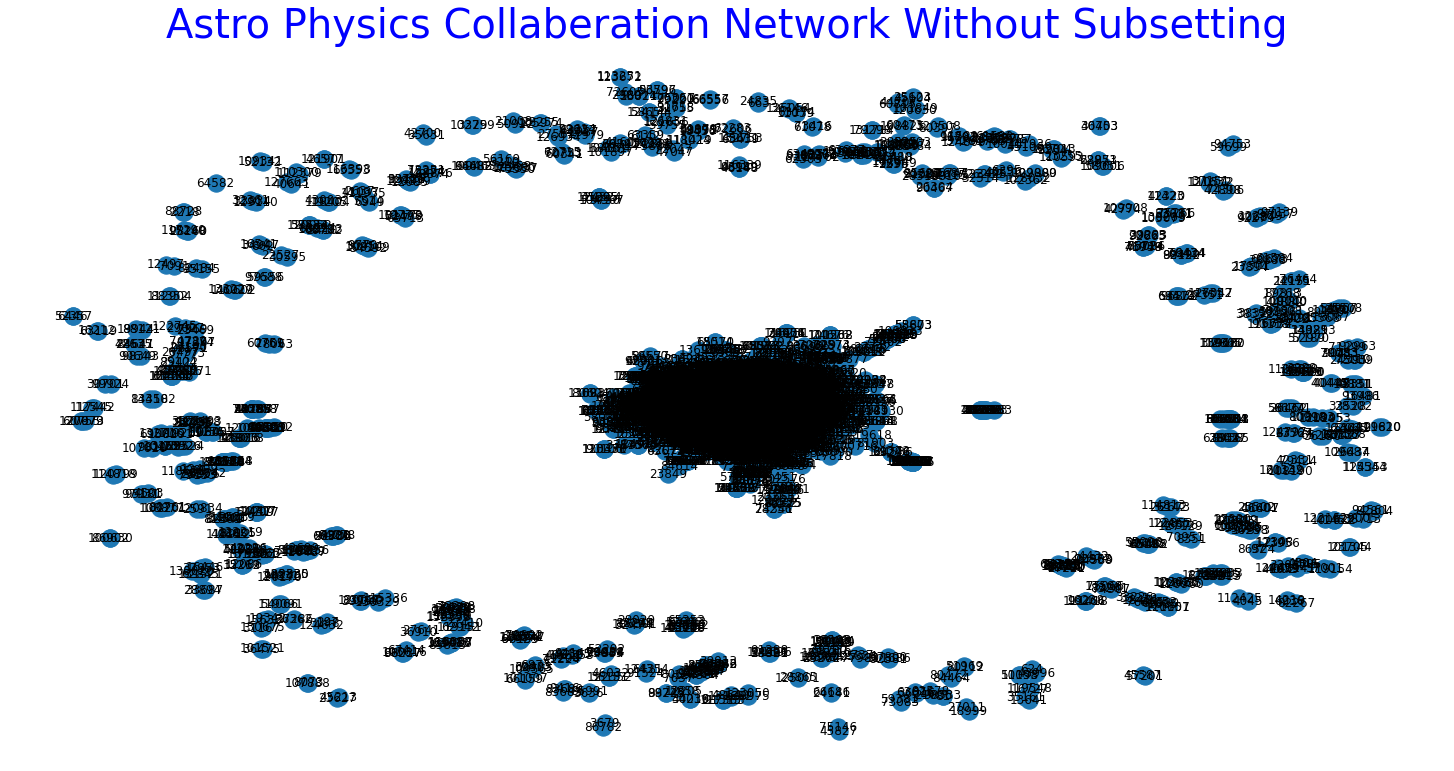

In [63]:
#plot
nx.draw(G1, with_labels = True)
plt.title('Astro Physics Collaberation Network Without Subsetting', fontsize = 40, color = 'Blue')
plt.show()

## Degree of the whole observation
### Identifying the degree parameter gives us information about the number of connections each node makes throughout the network. Below we print out the degree of the first 20 nodes in our whole network:

In [64]:
#print degree
count = 0
for i in nx.degree(G1):
    if count < 19:
        print(str(i[0]) + ':' + str(i[1]))
        count+=1

84424:75
276:31
1662:43
5089:2
6058:90
6229:42
10639:118
16442:30
19325:113
19834:3
20113:28
21937:8
25452:158
26902:3
29829:13
30222:77
32432:36
33040:257
39238:12


## Degree Centrality
### Degree centrality is a measure of positional features of nodes within the network that tell us which nodes are important players in a network.Degree centrality on the whole dataset has been calculated.

In [65]:
#calculate degree centrality for each node
dC1 = nx.degree_centrality(G1)

In [66]:
#display small part of dict
dict(list(dC1.items())[0:10])

{84424: 0.003995525011986575,
 276: 0.0016514836716211177,
 1662: 0.00229076767353897,
 5089: 0.00010654733365297533,
 6058: 0.00479463001438389,
 6229: 0.002237494006712482,
 10639: 0.006286292685525545,
 16442: 0.00159821000479463,
 19325: 0.006019924351393107,
 19834: 0.000159821000479463}

### With degree centrality data we can pin point the key players in this network by locating the nodes with the highest degree centrality.

In [67]:
#get all the keys in the list
nodes = list(dC1.keys())
#get all the values for each key
degCent = list(dC1.values())

#put them into a column df
data1 = {'nodes':  nodes,'degree centrality': degCent} #new dict
dfdC1 = pd.DataFrame(data1, columns = ['nodes', 'degree centrality'])

#sort the data in terms of centrality
dfdC1.sort_values(by=["degree centrality"], inplace = True)

#display nodes with highest degree centrality
dfdC1.tail()

,nodes,degree centrality
2125,93504,0.020617
2294,62821,0.022268
303,38109,0.022375
298,35290,0.022748
325,53213,0.026850


## Subsetting Data:

In [46]:
#subset first 200 rows (about half the data)
subData = rawData.loc[0:200]
#Display
subData

,From,To
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229
...,...,...
196,63225,30864
197,63225,39902
198,63225,42077
199,63225,49633



## Create Network on the Subsetted Dataset
### From the above subetted data, we know that there are 200 connections listed that are directed because there is information about the direction of each connection. 

In [47]:
#Count number of unique IDs in 'From' column
subData['From'].nunique()

4

In [48]:
#Count number of unique IDs in 'To' column
subData['To'].nunique()

190

In [49]:
#create lists for each node
froms = list(subData['From'].unique())
tos = list(subData['To'].unique())

### We can build a network object using the networkx package.

In [50]:
# greate a directed networkX object
G = nx.Graph()
#load data frame into network
G = nx.from_pandas_edgelist(subData , 'From','To')

In [51]:
#display information to confirm
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 191
Number of edges: 198
Average degree:   2.0733


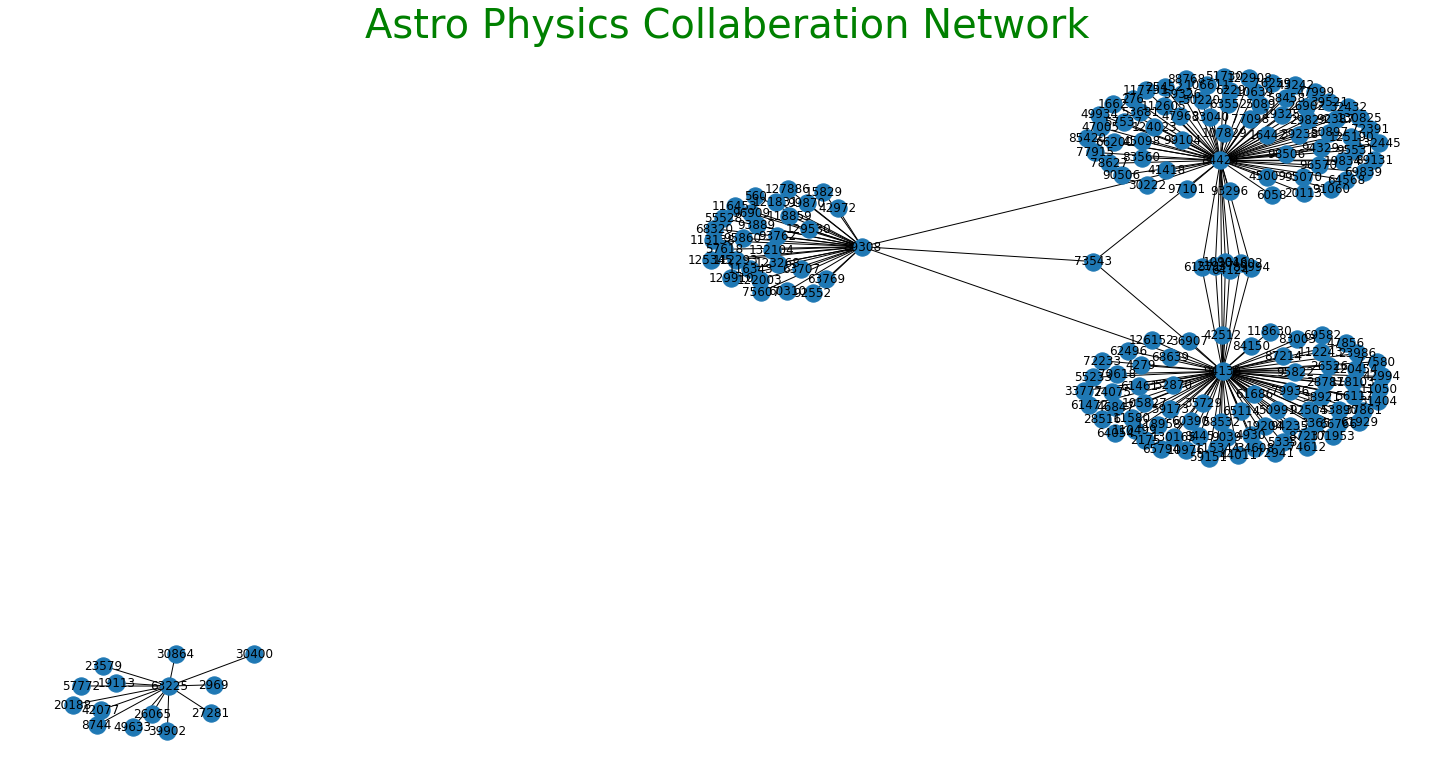

In [34]:
#plot
nx.draw(G, with_labels = True)
plt.title('Astro Physics Collaberation Network', fontsize = 40, color = 'Green')
plt.show()

We can see that this network contains various components that are not connected to eachother. In this case this network could best be described using a betweenness centrality metric because not all nodes are connected. Lets take a better look by repeating the above steps and subsetting the data further.

In [52]:

#subset first 100 rows (about half the data)
subDataTwo = rawData.loc[0:100]
# greate a networkX object
GTwo = nx.Graph()
#load data frame into network
GTwo = nx.from_pandas_edgelist(subDataTwo , source = 'From',target = 'To')
#display information to confirm
print(nx.info(GTwo))

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 100
Average degree:   2.0202


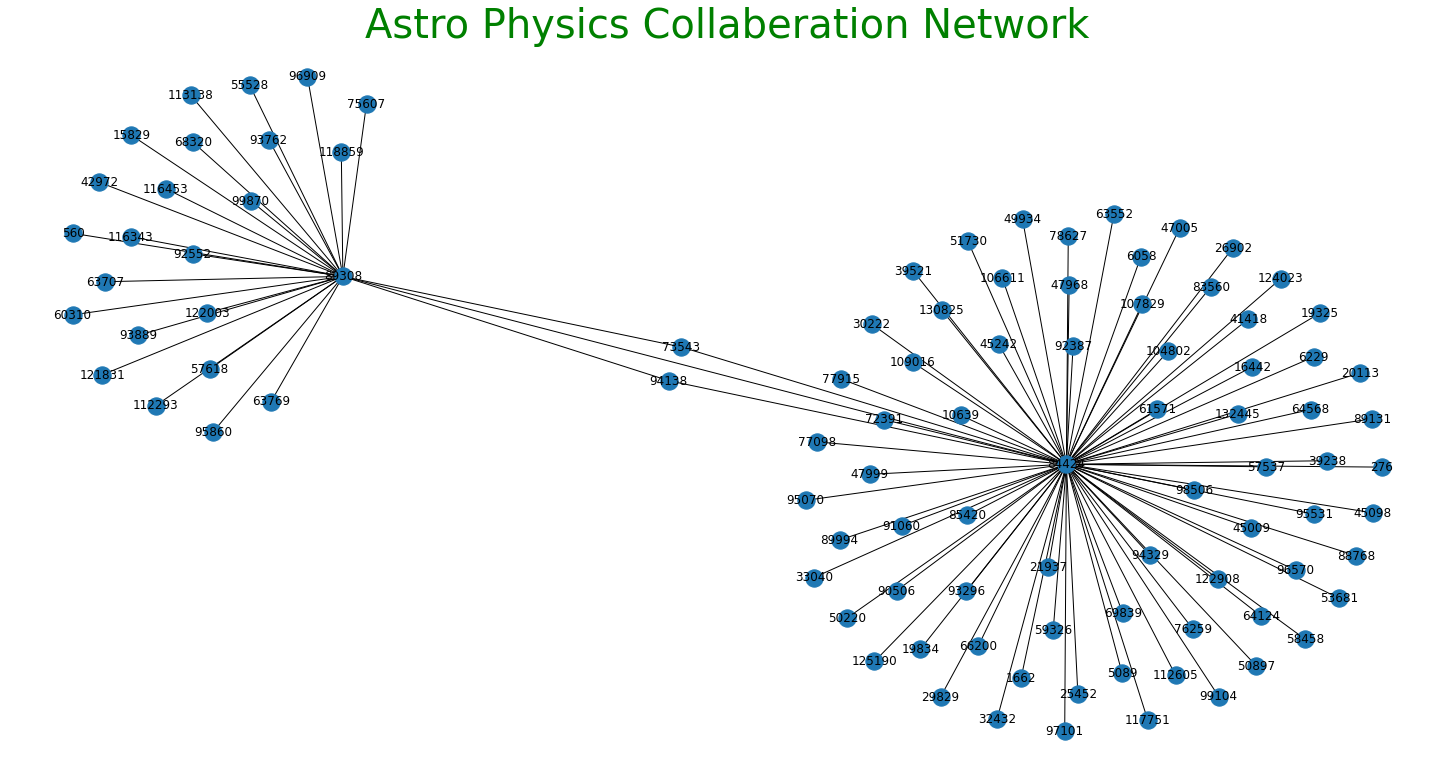

In [59]:

#plot
nx.draw(GTwo, with_labels = True)
plt.title('Astro Physics Collaberation Network', fontsize = 40, color = 'Green')
plt.show()


## Analysis
### We can see that there are 99 nodes and 100 connections in this subset of data. Visually we see that all the nodes are connected to eachother which three distinct areas where nodes are clustering therefore this is a multi modal network. The following measures have been calculated about this subset of data:

## Diameter & Average Path Length
### Measuring the diameter give us valuable information of how integrated each node is with one another in a network and basically how close each node is to one another. It is calculated by identifying the longest path between two nodes in our network. The average shortest path length gives us information about how far away each node is from the next node (on average) and is calculated by adding the shortest length between nodes and dividing by the total number of edges. This tells us the shortest number of steps needed (on average) from one node to get to another one.

In [53]:
#calculate the diameter
nx.diameter(GTwo)

3

In [54]:
print(nx.average_shortest_path_length(GTwo))

2.320758606472892


A diameter of 3 tells us that on the longest path between nodes is 3 hops away from one another in this subset,and A average path length of 2.3208 tells us that it takes a little over two hops for any node to get to any other one in this subset.

## Degree of the Subsetted Dataset

In [38]:
#print degree
count = 0
for i in nx.degree(GTwo):
    if count < 19:
        print(str(i[0]) + ':' + str(i[1]))
        count+=1

84424:75
276:1
1662:1
5089:1
6058:1
6229:1
10639:1
16442:1
19325:1
19834:1
20113:1
21937:1
25452:1
26902:1
29829:1
30222:1
32432:1
33040:1
39238:1


In order to dig deeper into the degree of this subset of data it is helpful to plot the degree distribution:

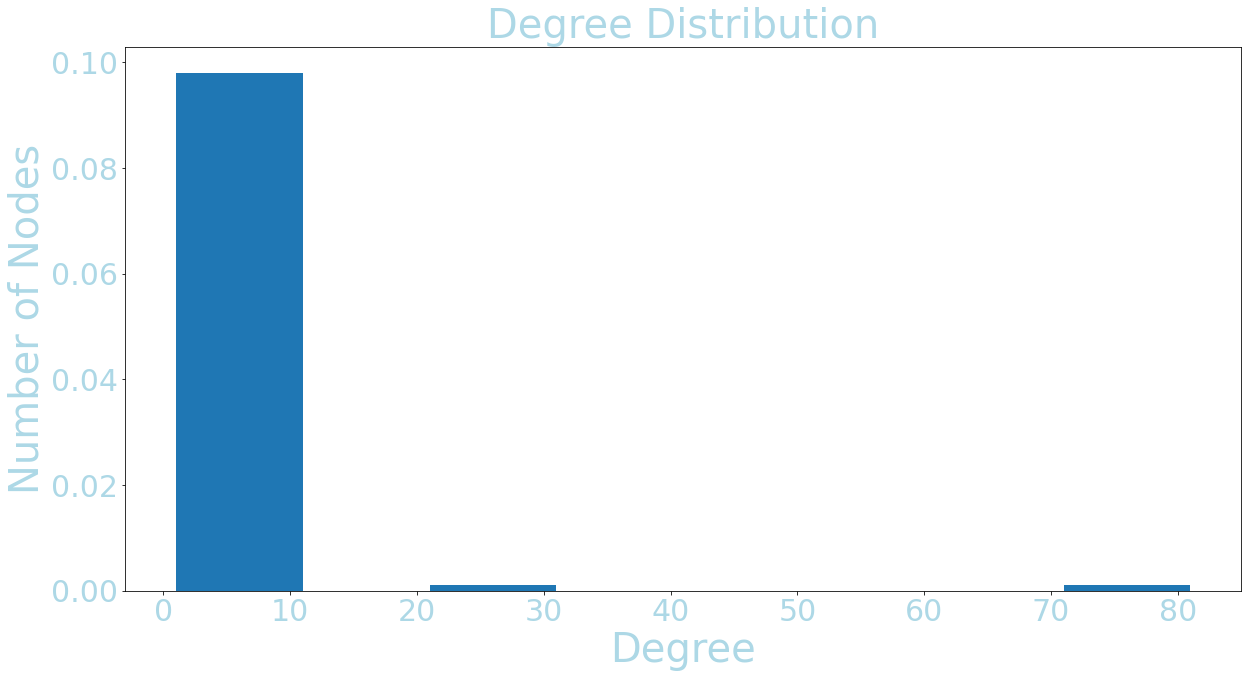

In [55]:

#degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    axes = plt.hist(degrees, bins=range(1, 75 + 10, 10), density=1, cumulative=0)
    plt.title('Degree Distribution', fontsize = 40, color = 'lightblue')
    plt.xlabel('Degree', fontsize = 40, color = 'lightblue')
    plt.ylabel('Number of Nodes', fontsize = 40, color = 'lightblue')
    plt.xticks(fontsize= 30, color = 'lightblue')
    plt.yticks(fontsize= 30, color = 'lightblue')
    plt.show()

plot_degree_dist(GTwo)

We can clearly see that there are very few nodes that are of a higher degree than most of the nodes in this network. This confirms the observations made from the visualization above in that there are a select few nodes that act as bridges between clusters in this network.

## Degree Centrality of the Subsetted Dataset
### Degree centrality is a measure of positional features of nodes within the network that tell us which nodes are important players in a network.

In [56]:

#calculate degree centrality for each node
dC = nx.degree_centrality(GTwo)

In [57]:
#display small part of dict
dict(list(dC.items())[0:10])

{84424: 0.7653061224489796,
 276: 0.01020408163265306,
 1662: 0.01020408163265306,
 5089: 0.01020408163265306,
 6058: 0.01020408163265306,
 6229: 0.01020408163265306,
 10639: 0.01020408163265306,
 16442: 0.01020408163265306,
 19325: 0.01020408163265306,
 19834: 0.01020408163265306}

Now that we have degree centrality data we can pin point the key players in this network by locating the nodes with the highest degree centrality.

In [58]:
#get all the keys in the list
nodes = list(dC.keys())
#get all the values for each key
degCent = list(dC.values())

#put them into a column df
data = {'nodes':  nodes,'degree centrality': degCent} #new dict
dfdC = pd.DataFrame(data, columns = ['nodes', 'degree centrality'])

#sort the data in terms of centrality
dfdC.sort_values(by=["degree centrality"], inplace = True)

#display nodes with highest degree centrality
dfdC.tail()

,nodes,degree centrality
35,61571,0.010204
57,94138,0.020408
42,73543,0.020408
51,89308,0.265306
0,84424,0.765306



We can see from the above output that there are 4 major nodes that play a big role in this network while all other nodes have the same degree of centrality of 0.010204. The nodes with ID 84424, 89308, 73543, and 94138 all play an important role in how this subset of the network functions. This is confirmed by look at the original visulaization where we see there are two mayjoe nodes at the center of each cluster and two node bridging both clusters.